In [1]:
import pandas as pd
import numpy as np
from math import pi

In [2]:
import platform
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 표기하기 위한 작업

In [3]:
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [2]:
food01 = pd.read_excel('../data/OPENDATA_FOOD_1.xls')
food02 = pd.read_excel('../data/OPENDATA_FOOD_2.xls')
food03 = pd.read_excel('../data/OPENDATA_FOOD_3.xls')

In [13]:
food01.head(10)

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,1,곡류 및 그 제품,"볶음밥,햄볶음밥",210,518.7,0,7.14,39.69,0.0,NaN,0,0.00,0.0
1,2,곡류 및 그 제품,"귀리(겉귀리), 도정곡, 생것",100,373.0,73.5,11.4,3.7,0.0,2,0,0.00,0.0
2,3,곡류 및 그 제품,"귀리(겉귀리), 도정곡, 생것",100,332.0,73.5,11.4,3.7,NaN,2,NaN,NaN,0.0
3,4,곡류 및 그 제품,"귀리(쌀귀리), 도정곡, 생것",100,371.0,70.4,14.3,3.8,0.0,3,0,0.00,0.0
4,5,곡류 및 그 제품,"귀리(쌀귀리), 도정곡, 생것",100,334.0,70.4,14.3,3.8,NaN,3,NaN,NaN,0.0
5,6,곡류 및 그 제품,"귀리 가공(기타), 오트밀",100,382.0,64.9,13.2,8.2,0.0,4,0,0.00,0.0
6,7,곡류 및 그 제품,"귀리 가공(기타), 오트밀",100,348.0,64.9,13.2,8.2,NaN,4,NaN,NaN,0.0
7,8,곡류 및 그 제품,"기장, 도정곡, 생것",100,367.0,74.6,11.2,1.9,0.0,6,0,0.00,0.0
8,9,곡류 및 그 제품,"기장, 도정곡, 생것",100,360.0,74.6,11.2,1.9,NaN,6,NaN,NaN,0.0
9,10,곡류 및 그 제품,"메밀, 도정곡, 생것",100,374.0,74.7,11.5,2.3,0.0,14,0,0.59,0.0


In [11]:
food01.duplicated(['식품이름'])

0       False
1       False
2        True
3       False
4        True
5       False
6        True
7       False
8        True
9       False
10       True
11      False
12       True
13      False
14       True
15      False
16       True
17      False
18       True
19      False
20       True
21      False
22       True
23      False
24       True
25      False
26      False
27       True
28      False
29       True
        ...  
4873     True
4874    False
4875     True
4876     True
4877     True
4878    False
4879     True
4880     True
4881     True
4882    False
4883     True
4884     True
4885     True
4886    False
4887     True
4888    False
4889    False
4890    False
4891     True
4892    False
4893     True
4894    False
4895     True
4896    False
4897     True
4898    False
4899    False
4900     True
4901     True
4902     True
Length: 4903, dtype: bool

- keep : first =  첫번째 행 또는 인자를 남기고 나머지는 삭제
- keep : last = 마지막 행 또는 인자를 남기고 나머지는 삭제

In [17]:
tmp_first = food01.drop_duplicates(['식품이름'], keep='first')
tmp_first.head(10)

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,1,곡류 및 그 제품,"볶음밥,햄볶음밥",210,518.7,0,7.14,39.69,0.0,NaN,0,0.00,0.0
1,2,곡류 및 그 제품,"귀리(겉귀리), 도정곡, 생것",100,373.0,73.5,11.4,3.7,0.0,2,0,0.00,0.0
3,4,곡류 및 그 제품,"귀리(쌀귀리), 도정곡, 생것",100,371.0,70.4,14.3,3.8,0.0,3,0,0.00,0.0
5,6,곡류 및 그 제품,"귀리 가공(기타), 오트밀",100,382.0,64.9,13.2,8.2,0.0,4,0,0.00,0.0
7,8,곡류 및 그 제품,"기장, 도정곡, 생것",100,367.0,74.6,11.2,1.9,0.0,6,0,0.00,0.0
9,10,곡류 및 그 제품,"메밀, 도정곡, 생것",100,374.0,74.7,11.5,2.3,0.0,14,0,0.59,0.0
11,12,곡류 및 그 제품,"메밀 가공(가루), 메밀가루",100,364.0,69.6,13.4,2.8,0.0,27,0,0.00,0.0
13,14,곡류 및 그 제품,"메밀 가공(면류), 메밀국수, 생면",100,276.0,61.4,7.3,0.1,0.0,1023,0,0.00,0.0
15,16,곡류 및 그 제품,"메밀 가공(면류), 메밀국수, 생면, 삶은것",100,142.0,28.7,6.6,0.1,0.0,183,0,0.00,0.0
17,18,곡류 및 그 제품,"메밀 가공(면류), 메밀국수, 건면",100,344.0,66.7,14,2.3,0.0,850,0,0.00,0.0


In [18]:
tmp_first.shape

(2605, 13)

In [19]:
tmp_last = food01.drop_duplicates(['식품이름'], keep='last')
tmp_last.head(10)

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,1,곡류 및 그 제품,"볶음밥,햄볶음밥",210,518.7,0,7.14,39.69,0.00,NaN,0,0.00,0.0
2,3,곡류 및 그 제품,"귀리(겉귀리), 도정곡, 생것",100,332.0,73.5,11.4,3.7,NaN,2,NaN,NaN,0.0
4,5,곡류 및 그 제품,"귀리(쌀귀리), 도정곡, 생것",100,334.0,70.4,14.3,3.8,NaN,3,NaN,NaN,0.0
6,7,곡류 및 그 제품,"귀리 가공(기타), 오트밀",100,348.0,64.9,13.2,8.2,NaN,4,NaN,NaN,0.0
8,9,곡류 및 그 제품,"기장, 도정곡, 생것",100,360.0,74.6,11.2,1.9,NaN,6,NaN,NaN,0.0
10,11,곡류 및 그 제품,"메밀, 도정곡, 생것",100,345.0,67.84,13.64,3.38,0.50,1,0,0.71,0.0
12,13,곡류 및 그 제품,"메밀 가공(가루), 메밀가루",100,355.0,71.36,12.96,3.29,0.37,1,0,0.70,0.0
14,15,곡류 및 그 제품,"메밀 가공(면류), 메밀국수, 생면",100,274.0,61.14,7.59,0.96,0.00,455,0,0.27,0.0
16,17,곡류 및 그 제품,"메밀 가공(면류), 메밀국수, 생면, 삶은것",100,117.0,25.73,3.54,0.44,0.00,38,0,0.13,0.0
18,19,곡류 및 그 제품,"메밀 가공(면류), 메밀국수, 건면",100,352.0,74.41,13.58,1.27,2.77,707,0,0.38,0.0


In [20]:
food02.head(10)

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,1,밥류,NaN,문어초밥(서울),250,362.50,70.11,18.51,0.92,9.24,1176.03,70.60,0.36,0.00
1,2,밥류,NaN,콩나물해장국(강원도),700,280.00,11.56,34.71,10.35,0.00,1731.65,127.46,1.71,0.04
2,3,밥류,NaN,콩나물해장국(경기도),700,231.00,10.18,19.94,11.97,0.00,1772.60,100.26,0.71,0.02
3,4,밥류,NaN,콩나물해장국(경상도),700,238.00,7.66,18.93,14.70,0.00,1768.23,155.74,1.55,0.04
4,5,밥류,NaN,콩나물해장국(서울),700,189.00,13.52,23.73,4.58,0.00,1885.58,132.21,1.55,0.03
5,6,밥류,NaN,콩나물해장국(전라도),700,259.00,20.29,20.18,10.46,0.33,2575.20,129.11,1.80,0.00
6,7,밥류,NaN,콩나물해장국(충청도),700,147.00,9.12,26.52,0.62,0.00,1972.24,105.40,1.53,0.02
7,8,밥류,NaN,소머리국밥,800,631.99,17.53,75.98,28.66,0.00,823.26,241.92,9.67,0.60
8,9,밥류,NaN,소머리국밥(강원도),800,616.00,3.62,86.18,28.35,0.00,578.10,276.39,10.38,0.58
9,10,밥류,NaN,소머리국밥(경기도),800,792.00,15.53,96.42,37.97,0.00,564.89,350.70,17.10,1.26


In [24]:
duplicated = food02.duplicated(['식품이름'])

In [31]:
duplicated.dtypes

dtype('bool')

In [60]:
r = []
length = len(duplicated)
k = 0
for i in range(length):
    if duplicated[i]:
        k = k + 1
        print(i, food02['식품이름'][i],food02['1회제공량 (g)'][i], food02['열량 (kcal)'][i])
print(k)

51 치즈김밥 300 1395.0
396 마늘빵 70 236.83
404 모닝빵 70 202.39
412 버터크림빵 70 205.8
427 카스텔라 70 158.76
499 야채빵 70 129.5
776 쌀국수 200 80.7
1111 장어탕 250 250.0
1436 라볶이 30 37.8
2042 백설기 70 139.65
2119 새우버거 158 664.71
2149 불고기버거 155 621.55
2152 치즈버거 114 345.42
2160 불고기버거 100 294.08
2169 치즈버거 133 486.78
2170 햄버거 121 370.26
2199 불고기버거 167 641.28
2597 베이컨체다치즈 (나폴리,L) 191 1002.37
2764 케이준쉬림프골드 L 100 233.5
2792 페퍼로니 백미떡도우 170 621.18
2866 한우핫불고기 흑미떡도우 103 199.97
2874 허니치킨피자 L 100 236.09
3006 고구마피자 100 243.81
3016 불고기피자 100 233.74
3222 리치골드미니스파이시 치킨 161 589.26
3398 바바리안먼치킨 70 249.73
3443 초코츄이스티 70 286.46
3553 마늘빵 100 482.75
3622 블루베리쉬폰 70 144.14
3739 쫀득쫀득한 찰깨빵 51 71.4
3751 찹쌀도우넛 80 192.0
3783 치즈케이크 70 250.0
3797 커피번 45 78.75
3812 크림치즈호두빵 91 259.35
3834 포켓샌드 땅콩 70 227.35
3850 햄버거 59 94.4
4192 머핀 51 93.33
4233 샤르르 녹는 치즈번 70 117.43
4237 소보로빵 73 175.93
4251 어니언베이글 100 267.38
4474 떡볶이 100 212.63
4475 떡볶이 100 119.4
4476 어묵 100 112.1
4477 고기만두 100 169.91
4478 김치만두 100 172.22
4479 떡볶이 100 136.66
4480 어묵 100 131.12


In [155]:
r = []
length = len(duplicated)
k = 0
dup_list = []
for i in range(length):
    if duplicated[i]:
        k = k + 1
        dup_list.append(food02.iloc[i])
        #print(i, food02['식품이름'][i],food02['1회제공량 (g)'][i], food02['열량 (kcal)'][i])
print(k)
print(dup_list)

69
[번호               52
식품군              밥류
식품이미지           NaN
식품이름           치즈김밥
1회제공량 (g)       300
열량 (kcal)      1395
탄수화물 (g)      234.9
단백질 (g)        52.2
지방 (g)           27
당류 (g)            0
나트륨 (mg)       2649
콜레스테롤 (mg)    151.2
포화지방산 (g)      12.6
트랜스지방산 (g)        0
Name: 51, dtype: object, 번호                397
식품군           빵 및 과자류
식품이미지             NaN
식품이름              마늘빵
1회제공량 (g)          70
열량 (kcal)      236.83
탄수화물 (g)        30.22
단백질 (g)          5.72
지방 (g)          10.62
당류 (g)           7.35
나트륨 (mg)          147
콜레스테롤 (mg)          0
포화지방산 (g)        5.72
트랜스지방산 (g)          0
Name: 396, dtype: object, 번호                405
식품군           빵 및 과자류
식품이미지             NaN
식품이름              모닝빵
1회제공량 (g)          70
열량 (kcal)      202.39
탄수화물 (g)        29.83
단백질 (g)          5.33
지방 (g)           6.39
당류 (g)          13.48
나트륨 (mg)       213.04
콜레스테롤 (mg)       5.33
포화지방산 (g)        2.13
트랜스지방산 (g)          0
Name: 404, dtype: object, 번호                413
식

In [166]:
tms = pd.DataFrame(dup_list)
tms.head(60)

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
51,52,밥류,NaN,치즈김밥,300,1395.00,234.90,52.20,27.00,0.00,2649.00,151.20,12.60,0.00
396,397,빵 및 과자류,NaN,마늘빵,70,236.83,30.22,5.72,10.62,7.35,147.00,0.00,5.72,0.00
404,405,빵 및 과자류,NaN,모닝빵,70,202.39,29.83,5.33,6.39,13.48,213.04,5.33,2.13,0.00
412,413,빵 및 과자류,NaN,버터크림빵,70,205.80,23.52,3.92,10.78,4.41,68.60,7.35,0.25,0.00
427,428,빵 및 과자류,NaN,카스텔라,70,158.76,30.87,2.94,2.94,12.74,115.15,45.08,1.47,0.00
499,500,빵 및 과자류,NaN,야채빵,70,129.50,24.50,4.20,1.82,2.80,7.00,7.00,0.35,0.00
776,777,면 및 만두류,NaN,쌀국수,200,80.70,11.06,7.98,0.28,0.00,68.48,0.00,0.00,0.00
1111,1112,찌개 및 전골류,NaN,장어탕,250,250.00,14.50,22.50,11.25,3.25,2275.00,50.00,0.75,0.00
1436,1437,볶음류,NaN,라볶이,30,37.80,7.02,0.90,0.72,0.81,46.80,0.00,0.09,0.00
2042,2043,"곡류, 서류 제품",NaN,백설기,70,139.65,31.85,2.45,0.00,14.70,117.60,0.00,0.00,0.00


In [170]:
tms = tms.reset_index(drop=True)
tms.head(10)

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,52,밥류,NaN,치즈김밥,300,1395.00,234.90,52.20,27.00,0.00,2649.00,151.20,12.60,0.0
1,397,빵 및 과자류,NaN,마늘빵,70,236.83,30.22,5.72,10.62,7.35,147.00,0.00,5.72,0.0
2,405,빵 및 과자류,NaN,모닝빵,70,202.39,29.83,5.33,6.39,13.48,213.04,5.33,2.13,0.0
3,413,빵 및 과자류,NaN,버터크림빵,70,205.80,23.52,3.92,10.78,4.41,68.60,7.35,0.25,0.0
4,428,빵 및 과자류,NaN,카스텔라,70,158.76,30.87,2.94,2.94,12.74,115.15,45.08,1.47,0.0
5,500,빵 및 과자류,NaN,야채빵,70,129.50,24.50,4.20,1.82,2.80,7.00,7.00,0.35,0.0
6,777,면 및 만두류,NaN,쌀국수,200,80.70,11.06,7.98,0.28,0.00,68.48,0.00,0.00,0.0
7,1112,찌개 및 전골류,NaN,장어탕,250,250.00,14.50,22.50,11.25,3.25,2275.00,50.00,0.75,0.0
8,1437,볶음류,NaN,라볶이,30,37.80,7.02,0.90,0.72,0.81,46.80,0.00,0.09,0.0
9,2043,"곡류, 서류 제품",NaN,백설기,70,139.65,31.85,2.45,0.00,14.70,117.60,0.00,0.00,0.0


In [172]:
del tms['식품이미지']

In [174]:
tms.head(70)

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,52,밥류,치즈김밥,300,1395.00,234.90,52.20,27.00,0.00,2649.00,151.20,12.60,0.00
1,397,빵 및 과자류,마늘빵,70,236.83,30.22,5.72,10.62,7.35,147.00,0.00,5.72,0.00
2,405,빵 및 과자류,모닝빵,70,202.39,29.83,5.33,6.39,13.48,213.04,5.33,2.13,0.00
3,413,빵 및 과자류,버터크림빵,70,205.80,23.52,3.92,10.78,4.41,68.60,7.35,0.25,0.00
4,428,빵 및 과자류,카스텔라,70,158.76,30.87,2.94,2.94,12.74,115.15,45.08,1.47,0.00
5,500,빵 및 과자류,야채빵,70,129.50,24.50,4.20,1.82,2.80,7.00,7.00,0.35,0.00
6,777,면 및 만두류,쌀국수,200,80.70,11.06,7.98,0.28,0.00,68.48,0.00,0.00,0.00
7,1112,찌개 및 전골류,장어탕,250,250.00,14.50,22.50,11.25,3.25,2275.00,50.00,0.75,0.00
8,1437,볶음류,라볶이,30,37.80,7.02,0.90,0.72,0.81,46.80,0.00,0.09,0.00
9,2043,"곡류, 서류 제품",백설기,70,139.65,31.85,2.45,0.00,14.70,117.60,0.00,0.00,0.00


In [179]:
list_count = {}
for lst in tms['식품이름']:
    try:
        list_count[lst] += 1
    except:
        list_count[lst] = 1
print(list_count)

{'햄버거': 2, '땅콩전병': 1, '리치골드미니스파이시 치킨': 1, '크림치즈호두빵': 1, '샤르르 녹는 치즈번': 1, '머핀': 1, '치즈케이크': 1, '포켓샌드 땅콩': 1, '야채빵': 1, '쫀득쫀득한 찰깨빵': 1, '라볶이': 1, '어묵': 4, '케이준쉬림프골드 L': 1, '불고기피자': 1, '치즈김밥': 1, '마늘토스트': 2, '어니언베이글': 1, '불고기버거': 3, '백설기': 1, '아몬드 크로칸트 쿠키': 1, '페퍼로니 백미떡도우': 1, '베이컨체다치즈 (나폴리,L)': 1, '한우핫불고기 흑미떡도우': 1, '새우버거': 1, '라메종드 아모린카라멜': 1, '김치만두': 4, '비빔만두': 1, '모닝빵': 1, '카스텔라': 1, '초코쿠키': 1, '소보로빵': 1, '치즈떡볶이': 2, '초코츄이스티': 1, '해물만두': 1, '장어탕': 1, '떡볶이': 5, '블루베리쉬폰': 1, '커피번': 1, '치즈버거': 2, '고구마피자': 1, '찹쌀도우넛': 1, '버터크림빵': 1, '마늘빵': 2, '군만두': 1, '허니치킨피자 L': 1, '고기만두': 4, '쌀국수': 1, '모듬만두': 1, '바바리안먼치킨': 1}


In [180]:
list_count = {}
for lst in tms['식품군']:
    try:
        list_count[lst] += 1
    except:
        list_count[lst] = 1
print(list_count)

{'곡류, 서류 제품': 1, '햄버거': 7, '볶음류': 1, '과자': 6, '제빵': 15, '면 및 만두류': 1, '밥류': 1, '피자': 8, '빵 및 과자류': 5, '분식': 23, '찌개 및 전골류': 1}


In [194]:
tms_count = tms['식품군'].groupby(tms['식품군']).describe()
tms_count.head(10)

,count,unique,top,freq
식품군,,,,
"곡류, 서류 제품",1,1,"곡류, 서류 제품",1
과자,6,1,과자,6
면 및 만두류,1,1,면 및 만두류,1
밥류,1,1,밥류,1
볶음류,1,1,볶음류,1
분식,23,1,분식,23
빵 및 과자류,5,1,빵 및 과자류,5
제빵,15,1,제빵,15
찌개 및 전골류,1,1,찌개 및 전골류,1


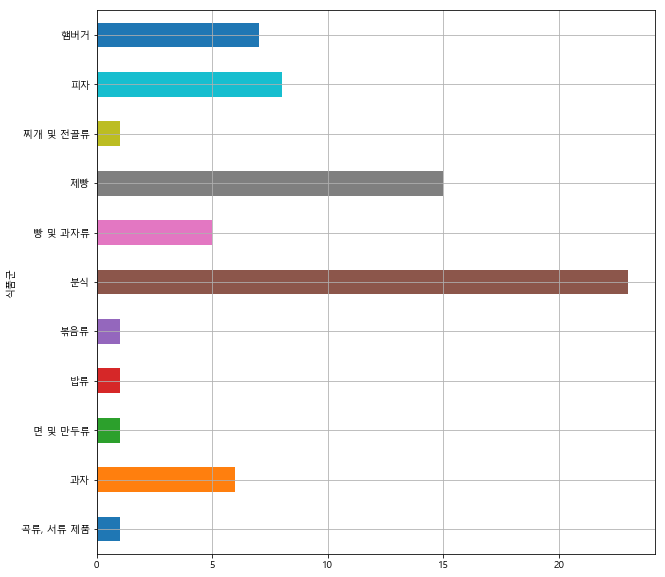

In [199]:
tms_count['count'].plot(kind='barh', grid= True, figsize = (10,10))
plt.show()

In [201]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height), ha='center', va='bottom')

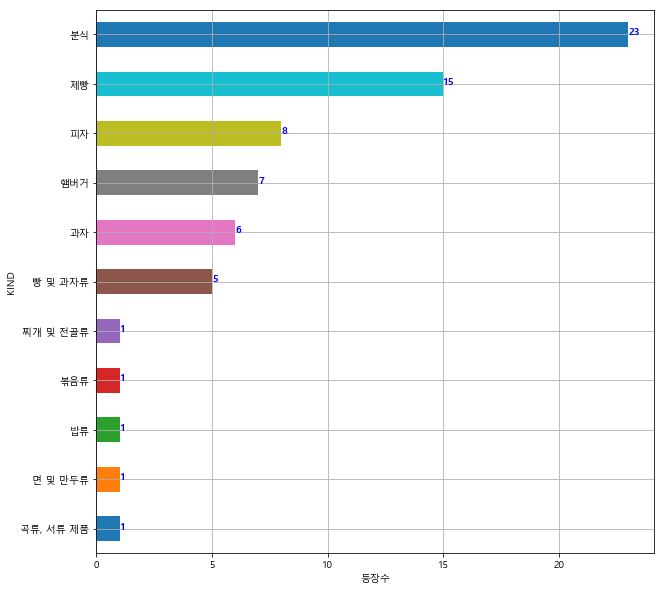

In [208]:
tms_count['count'].sort_values().plot(kind='barh', grid= True, figsize = (10,10))
plt.xlabel('등장수')
plt.ylabel('KIND')
for i, v in enumerate(tms_count['count'].sort_values()):
    plt.text(v, i, str(v), color='blue', fontweight='bold')
plt.show()

In [185]:
list_count['햄버거']

7

In [47]:
food02['식품이름'][10]

'소머리국밥(경상도)'

In [52]:
food02.shape

(4576, 14)

In [53]:
food03.shape

(25070, 13)

In [54]:
food01.shape

(4903, 13)

In [66]:
food02['식품이름'].filter(like='떡볶이')

Series([], Name: 식품이름, dtype: object)

In [61]:
food02.columns

Index(['번호', '식품군', '식품이미지', '식품이름', '1회제공량 (g)', '열량 (kcal)', '탄수화물 (g)',
       '단백질 (g)', '지방 (g)', '당류 (g)', '나트륨 (mg)', '콜레스테롤 (mg)', '포화지방산 (g)',
       '트랜스지방산 (g)'],
      dtype='object')

In [70]:
rice_cake = food02[food02['식품이름'].str.contains('떡볶이')]

In [71]:
rice_cake.shape

(19, 14)

In [72]:
rice_cake

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
1412,1413,볶음류,NaN,떡볶이(전라도),200,338.00,72.80,8.14,1.69,7.34,836.25,8.15,0.51,0.01
1434,1435,볶음류,NaN,떡볶이(충청도),200,332.00,72.45,8.31,0.99,8.40,821.88,9.04,0.62,0.01
1471,1472,볶음류,NaN,떡볶이,200,303.53,60.48,7.61,3.46,6.83,853.08,7.49,0.75,0.00
1473,1474,볶음류,NaN,떡볶이(강원도),200,284.00,49.80,5.73,6.92,5.27,895.60,11.69,0.93,0.00
1475,1476,볶음류,NaN,떡볶이(경기도),200,316.00,54.70,7.68,7.43,7.39,831.81,9.21,1.22,0.00
1477,1478,볶음류,NaN,떡볶이(경상도),200,294.00,62.93,8.29,1.01,8.54,785.72,4.59,0.34,0.00
1478,1479,볶음류,NaN,떡볶이(서울),200,256.00,50.22,7.50,2.73,4.05,947.23,2.25,0.89,0.00
1525,1526,볶음류,NaN,조랭이 떡 궁중 떡볶이,185,217.45,43.31,5.68,2.57,0.00,343.45,0.00,0.00,0.00
4474,4475,분식,NaN,떡볶이,100,212.63,43.25,3.62,2.80,4.09,531.00,0.00,0.33,0.00
4475,4476,분식,NaN,떡볶이,100,119.40,21.69,3.22,2.20,3.07,417.80,0.00,0.17,0.00


In [101]:
rice_cake[:][:20]

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
1412,1413,볶음류,NaN,떡볶이(전라도),200,338.00,72.80,8.14,1.69,7.34,836.25,8.15,0.51,0.01
1434,1435,볶음류,NaN,떡볶이(충청도),200,332.00,72.45,8.31,0.99,8.40,821.88,9.04,0.62,0.01
1471,1472,볶음류,NaN,떡볶이,200,303.53,60.48,7.61,3.46,6.83,853.08,7.49,0.75,0.00
1473,1474,볶음류,NaN,떡볶이(강원도),200,284.00,49.80,5.73,6.92,5.27,895.60,11.69,0.93,0.00
1475,1476,볶음류,NaN,떡볶이(경기도),200,316.00,54.70,7.68,7.43,7.39,831.81,9.21,1.22,0.00
1477,1478,볶음류,NaN,떡볶이(경상도),200,294.00,62.93,8.29,1.01,8.54,785.72,4.59,0.34,0.00
1478,1479,볶음류,NaN,떡볶이(서울),200,256.00,50.22,7.50,2.73,4.05,947.23,2.25,0.89,0.00
1525,1526,볶음류,NaN,조랭이 떡 궁중 떡볶이,185,217.45,43.31,5.68,2.57,0.00,343.45,0.00,0.00,0.00
4474,4475,분식,NaN,떡볶이,100,212.63,43.25,3.62,2.80,4.09,531.00,0.00,0.33,0.00
4475,4476,분식,NaN,떡볶이,100,119.40,21.69,3.22,2.20,3.07,417.80,0.00,0.17,0.00


In [112]:
rice_cake.iloc[0]['1회제공량 (g)'] / 2

100.0

In [74]:
rice_cake.duplicated('식품이름')

KeyError: 0

In [84]:
pd.pivot_table(rice_cake, index=['식품이름','1회제공량 (g)', '탄수화물 (g)', '단백질 (g)', '지방 (g)'])

나트륨 (mg)  당류 (g)    번호  \
식품이름         1회제공량 (g) 탄수화물 (g) 단백질 (g) 지방 (g)                           
떡볶이          100       21.69    3.22    2.20      417.80    3.07  4476   
                       27.00    2.60    2.03      540.40    2.94  4480   
                       34.30    3.01    4.38      563.30    5.20  4487   
                       43.23    3.37    0.77      356.10    6.28  4510   
                       43.25    3.62    2.80      531.00    4.09  4475   
             200       60.48    7.61    3.46      853.08    6.83  1472   
떡볶이(강원도)     200       49.80    5.73    6.92      895.60    5.27  1474   
떡볶이(경기도)     200       54.70    7.68    7.43      831.81    7.39  1476   
떡볶이(경상도)     200       62.93    8.29    1.01      785.72    8.54  1478   
떡볶이(밀)       100       30.38    3.97    2.38      506.30    5.77  4508   
떡볶이(서울)      200       50.22    7.50    2.73      947.23    4.05  1479   
떡볶이(쌀)       100       34.30    2.60    3.82      481.20    2.53  4509   
떡볶이(전라도)     200       72.80    8.14    1.69      836.25    7.34  1413   
떡볶이(충청도)     200       72.45    8.31    0.99      821.88    8.40  1435   
스페셜떡볶이       100       39.13    4.27    2.16      547.26    4.69  4485   
조랭이 떡 궁중 떡볶이 185       43.31    5.68    2.57      343.45    0.00  1526   
치즈떡볶이        100       23.55    3.59    5.43      444.84    2.42  4482   
                       30.76    4.89    3.51      477.58    1.45  4483   
                       32.00    3.36    5.26      397.60    5.70  4486   

                                                열량 (kcal)  콜레스테롤 (mg)  \
식품이름         1회제공량 (g) 탄수화물 (g) 단백질 (g) 지방 (g)                          
떡볶이          100       21.69    3.22    2.20       119.40        0.00   
                       27.00    2.60    2.03       136.66        0.00   
                       34.30    3.01    4.38       188.62        0.00   
                       43.23    3.37    0.77       193.32        0.00   
                       43.25    3.62    2.80       212.63        0.00   
             200       60.48    7.61    3.46       303.53        7.49   
떡볶이(강원도)     200       49.80    5.73    6.92       284.00       11.69   
떡볶이(경기도)     200       54.70    7.68    7.43       316.00        9.21   
떡볶이(경상도)     200       62.93    8.29    1.01       294.00        4.59   
떡볶이(밀)       100       30.38    3.97    2.38       158.81        0.00   
떡볶이(서울)      200       50.22    7.50    2.73       256.00        2.25   
떡볶이(쌀)       100       34.30    2.60    3.82       181.98        0.00   
떡볶이(전라도)     200       72.80    8.14    1.69       338.00        8.15   
떡볶이(충청도)     200       72.45    8.31    0.99       332.00        9.04   
스페셜떡볶이       100       39.13    4.27    2.16       193.08        0.00   
조랭이 떡 궁중 떡볶이 185       43.31    5.68    2.57       217.45        0.00   
치즈떡볶이        100       23.55    3.59    5.43       157.44        0.00   
                       30.76    4.89    3.51       174.21        0.00   
                       32.00    3.36    5.26       188.80        0.00   

                                                트랜스지방산 (g)  포화지방산 (g)  
식품이름         1회제공량 (g) 탄수화물 (g) 단백질 (g) 지방 (g)                         
떡볶이          100       21.69    3.22    2.20          0.00       0.17  
                       27.00    2.60    2.03          0.00       0.36  
                       34.30    3.01    4.38          0.00       0.19  
                       43.23    3.37    0.77          0.00       0.30  
                       43.25    3.62    2.80          0.00       0.33  
             200       60.48    7.61    3.46          0.00       0.75  
떡볶이(강원도)     200       49.80    5.73    6.92          0.00       0.93  
떡볶이(경기도)     200       54.70    7.68    7.43          0.00       1.22  
떡볶이(경상도)     200       62.93    8.29    1.01          0.00       0.34  
떡볶이(밀)       100       30.38    3.97    2.38          0.00       0.12  
떡볶이(서울)      200       50.22    7.50    2.73          0.00       0.89  
떡볶이(쌀)       100       

In [86]:
pd.pivot_table(rice_cake, index=['식품이름','1회제공량 (g)','열량 (kcal)', '탄수화물 (g)', '단백질 (g)', '지방 (g)'])

나트륨 (mg)  당류 (g)  \
식품이름         1회제공량 (g) 열량 (kcal) 탄수화물 (g) 단백질 (g) 지방 (g)                     
떡볶이          100       119.40    21.69    3.22    2.20      417.80    3.07   
                       136.66    27.00    2.60    2.03      540.40    2.94   
                       188.62    34.30    3.01    4.38      563.30    5.20   
                       193.32    43.23    3.37    0.77      356.10    6.28   
                       212.63    43.25    3.62    2.80      531.00    4.09   
             200       303.53    60.48    7.61    3.46      853.08    6.83   
떡볶이(강원도)     200       284.00    49.80    5.73    6.92      895.60    5.27   
떡볶이(경기도)     200       316.00    54.70    7.68    7.43      831.81    7.39   
떡볶이(경상도)     200       294.00    62.93    8.29    1.01      785.72    8.54   
떡볶이(밀)       100       158.81    30.38    3.97    2.38      506.30    5.77   
떡볶이(서울)      200       256.00    50.22    7.50    2.73      947.23    4.05   
떡볶이(쌀)       100       181.98    34.30    2.60    3.82      481.20    2.53   
떡볶이(전라도)     200       338.00    72.80    8.14    1.69      836.25    7.34   
떡볶이(충청도)     200       332.00    72.45    8.31    0.99      821.88    8.40   
스페셜떡볶이       100       193.08    39.13    4.27    2.16      547.26    4.69   
조랭이 떡 궁중 떡볶이 185       217.45    43.31    5.68    2.57      343.45    0.00   
치즈떡볶이        100       157.44    23.55    3.59    5.43      444.84    2.42   
                       174.21    30.76    4.89    3.51      477.58    1.45   
                       188.80    32.00    3.36    5.26      397.60    5.70   

                                                            번호  콜레스테롤 (mg)  \
식품이름         1회제공량 (g) 열량 (kcal) 탄수화물 (g) 단백질 (g) 지방 (g)                     
떡볶이          100       119.40    21.69    3.22    2.20    4476        0.00   
                       136.66    27.00    2.60    2.03    4480        0.00   
                       188.62    34.30    3.01    4.38    4487        0.00   
                       193.32    43.23    3.37    0.77    4510        0.00   
                       212.63    43.25    3.62    2.80    4475        0.00   
             200       303.53    60.48    7.61    3.46    1472        7.49   
떡볶이(강원도)     200       284.00    49.80    5.73    6.92    1474       11.69   
떡볶이(경기도)     200       316.00    54.70    7.68    7.43    1476        9.21   
떡볶이(경상도)     200       294.00    62.93    8.29    1.01    1478        4.59   
떡볶이(밀)       100       158.81    30.38    3.97    2.38    4508        0.00   
떡볶이(서울)      200       256.00    50.22    7.50    2.73    1479        2.25   
떡볶이(쌀)       100       181.98    34.30    2.60    3.82    4509        0.00   
떡볶이(전라도)     200       338.00    72.80    8.14    1.69    1413        8.15   
떡볶이(충청도)     200       332.00    72.45    8.31    0.99    1435        9.04   
스페셜떡볶이       100       193.08    39.13    4.27    2.16    4485        0.00   
조랭이 떡 궁중 떡볶이 185       217.45    43.31    5.68    2.57    1526        0.00   
치즈떡볶이        100       157.44    23.55    3.59    5.43    4482        0.00   
                       174.21    30.76    4.89    3.51    4483        0.00   
                       188.80    32.00    3.36    5.26    4486        0.00   

                                                          트랜스지방산 (g)  \
식품이름         1회제공량 (g) 열량 (kcal) 탄수화물 (g) 단백질 (g) 지방 (g)               
떡볶이          100       119.40    21.69    3.22    2.20          0.00   
                       136.66    27.00    2.60    2.03          0.00   
                       188.62    34.30    3.01    4.38          0.00   
                       193.32    43.23    3.37    0.77          0.00   
                       212.63    43.25    3.62    2.80          0.00   
             200       303.53    60.48    7.61    3.46          0.00   
떡볶이(강원도)     200       284.00    49.80    5.73    6.92          0.00   
떡볶이(경기도)     200       316.00    54.70    7.68    7.43          0.00   
떡볶이(경상도)     200       294.00    62.93    8.29    1.01      

In [85]:
pd.pivot_table(rice_cake, index=['식품이름'])

,1회제공량 (g),나트륨 (mg),단백질 (g),당류 (g),번호,열량 (kcal),지방 (g),콜레스테롤 (mg),탄수화물 (g),트랜스지방산 (g),포화지방산 (g)
식품이름,,,,,,,,,,,
떡볶이,116.666667,543.613333,3.905000,4.735,3983.333333,192.360000,2.606667,1.248333,38.325,0.00,0.350000
떡볶이(강원도),200.000000,895.600000,5.730000,5.270,1474.000000,284.000000,6.920000,11.690000,49.800,0.00,0.930000
떡볶이(경기도),200.000000,831.810000,7.680000,7.390,1476.000000,316.000000,7.430000,9.210000,54.700,0.00,1.220000
떡볶이(경상도),200.000000,785.720000,8.290000,8.540,1478.000000,294.000000,1.010000,4.590000,62.930,0.00,0.340000
떡볶이(밀),100.000000,506.300000,3.970000,5.770,4508.000000,158.810000,2.380000,0.000000,30.380,0.00,0.120000
떡볶이(서울),200.000000,947.230000,7.500000,4.050,1479.000000,256.000000,2.730000,2.250000,50.220,0.00,0.890000
떡볶이(쌀),100.000000,481.200000,2.600000,2.530,4509.000000,181.980000,3.820000,0.000000,34.300,0.00,0.170000
떡볶이(전라도),200.000000,836.250000,8.140000,7.340,1413.000000,338.000000,1.690000,8.150000,72.800,0.01,0.510000
떡볶이(충청도),200.000000,821.880000,8.310000,8.400,1435.000000,332.000000,0.990000,9.040000,72.450,0.01,0.620000


In [90]:
rice_cake.index.union()

TypeError: union() missing 1 required positional argument: 'other'

In [113]:
rice_cake['식품이름'].unique()

array(['떡볶이(전라도)', '떡볶이(충청도)', '떡볶이', '떡볶이(강원도)', '떡볶이(경기도)', '떡볶이(경상도)',
       '떡볶이(서울)', '조랭이 떡 궁중 떡볶이', '치즈떡볶이', '스페셜떡볶이', '떡볶이(밀)', '떡볶이(쌀)'],
      dtype=object)

In [127]:
food02[food02['식품이름'].str.match('()')]

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,1,밥류,NaN,문어초밥(서울),250,362.50,70.11,18.51,0.92,9.24,1176.03,70.60,0.36,0.00
1,2,밥류,NaN,콩나물해장국(강원도),700,280.00,11.56,34.71,10.35,0.00,1731.65,127.46,1.71,0.04
2,3,밥류,NaN,콩나물해장국(경기도),700,231.00,10.18,19.94,11.97,0.00,1772.60,100.26,0.71,0.02
3,4,밥류,NaN,콩나물해장국(경상도),700,238.00,7.66,18.93,14.70,0.00,1768.23,155.74,1.55,0.04
4,5,밥류,NaN,콩나물해장국(서울),700,189.00,13.52,23.73,4.58,0.00,1885.58,132.21,1.55,0.03
5,6,밥류,NaN,콩나물해장국(전라도),700,259.00,20.29,20.18,10.46,0.33,2575.20,129.11,1.80,0.00
6,7,밥류,NaN,콩나물해장국(충청도),700,147.00,9.12,26.52,0.62,0.00,1972.24,105.40,1.53,0.02
7,8,밥류,NaN,소머리국밥,800,631.99,17.53,75.98,28.66,0.00,823.26,241.92,9.67,0.60
8,9,밥류,NaN,소머리국밥(강원도),800,616.00,3.62,86.18,28.35,0.00,578.10,276.39,10.38,0.58
9,10,밥류,NaN,소머리국밥(경기도),800,792.00,15.53,96.42,37.97,0.00,564.89,350.70,17.10,1.26


In [224]:
food02[food02['식품이름'].str.contains('우동', regex=True)]

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
687,688,면 및 만두류,NaN,우동(일식),700,421.51,74.20,13.39,7.90,2.48,2390.32,25.98,1.49,0.01
688,689,면 및 만두류,NaN,우동(일식)(강원도),700,532.00,68.64,13.57,22.65,4.91,2566.25,60.52,1.25,0.00
689,690,면 및 만두류,NaN,우동(일식)(경기도),700,371.00,68.93,11.80,5.26,1.62,2116.23,13.40,0.77,0.00
690,691,면 및 만두류,NaN,우동(일식)(경상도),700,434.00,80.12,11.00,7.50,1.71,2479.39,0.88,1.00,0.01
691,692,면 및 만두류,NaN,우동(일식)(서울),700,420.00,74.00,17.32,6.30,2.84,2512.67,55.65,1.00,0.01
692,693,면 및 만두류,NaN,우동(일식)(전라도),700,385.00,75.34,14.27,3.13,1.01,2435.50,14.18,0.81,0.01
693,694,면 및 만두류,NaN,우동(일식)(충청도),700,385.00,78.15,12.39,2.60,2.81,2231.88,11.24,4.09,0.04
694,695,면 및 만두류,NaN,우동(중식),1000,648.47,85.37,29.45,21.02,1.10,3395.86,208.42,3.35,0.03
695,696,면 및 만두류,NaN,우동(중식)(강원도),1000,580.00,87.77,30.25,12.40,2.55,3315.99,203.69,3.48,0.00
696,697,면 및 만두류,NaN,우동(중식)(경기도),1000,640.00,99.90,32.51,12.77,0.43,3463.73,204.20,1.81,0.00


In [216]:
food02[food02['식품이름'].str.contains('(경상도)', regex = True)]

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
3,4,밥류,NaN,콩나물해장국(경상도),700,238.0,7.66,18.93,14.70,0.00,1768.23,155.74,1.55,0.04
10,11,밥류,NaN,소머리국밥(경상도),800,784.0,30.76,86.93,34.96,0.00,1091.48,291.50,10.96,0.49
18,19,밥류,NaN,김밥(경상도),200,310.0,54.21,6.81,7.36,1.36,784.90,23.98,2.22,0.02
25,26,밥류,NaN,김치김밥(경상도),250,335.0,62.06,11.40,4.60,2.91,1108.53,71.60,1.49,0.00
32,33,밥류,NaN,샐러드김밥(경상도),250,400.0,58.10,10.85,13.87,5.99,958.02,77.97,2.83,0.00
39,40,밥류,NaN,소고기김밥(경상도),250,370.0,63.03,16.02,5.85,0.35,1100.37,75.37,2.26,0.06
46,47,밥류,NaN,참치김밥(경상도),250,415.0,68.93,13.62,9.47,0.19,776.53,40.16,2.86,0.05
54,55,밥류,NaN,치즈김밥(경상도),250,422.5,63.83,12.26,13.05,1.17,1100.54,84.21,4.05,0.22
61,62,밥류,NaN,충무김밥(경상도),400,564.0,105.38,24.85,4.93,20.82,1266.14,168.36,1.00,0.01
68,69,밥류,NaN,고추장불고기 삼각김밥(경상도),100,165.0,35.71,3.62,0.84,0.25,419.02,1.58,0.35,0.01


In [223]:
test.loc[test['식품이름'] == '우동(일식)(경상도)']

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
690,691,면 및 만두류,NaN,우동(일식)(경상도),700,434.0,80.12,11.0,7.5,1.71,2479.39,0.88,1.0,0.01


In [226]:
food02[food02['식품이름'].str.contains('\w+\s+\d')]

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
3395,3396,제빵,NaN,미니도넛 6팩,63,189.00,21.42,2.52,11.34,6.93,214.20,0.00,5.04,0.0
3510,3511,제빵,NaN,나를위한선택 53.5,70,129.50,20.30,4.90,3.50,3.50,175.00,38.50,1.05,0.0
3731,3732,제빵,NaN,저온숙성 56시간\n 부드러운 토스트,70,122.50,21.70,3.50,2.45,2.80,217.00,7.00,1.40,0.0
4150,4151,제빵,NaN,고구마생크림 1호,70,125.30,14.00,1.40,7.00,7.00,43.40,42.00,4.20,0.0
4186,4187,제빵,NaN,롤케익 1호,70,159.60,22.40,3.50,6.30,13.30,76.30,140.70,2.80,0.0
4187,4188,제빵,NaN,롤케익 2호,70,156.10,22.40,3.50,6.30,13.30,79.10,112.70,2.80,0.0
4265,4266,제빵,NaN,체리파크 1호,70,114.80,15.40,1.40,5.60,10.50,56.00,32.90,3.50,0.0
4285,4286,제빵,NaN,치즈파운드 1줄,57,124.83,13.11,2.28,7.41,6.27,112.86,37.62,3.99,0.0
4310,4311,제빵,NaN,프리미엄생크림 2호,70,122.50,14.70,1.40,6.30,9.80,54.60,31.50,4.20,0.0
4453,4454,아이스크림,NaN,엄마는 외계인 2(비알코리아),100,240.00,28.00,4.00,13.00,26.00,105.00,40.00,8.00,0.0


In [227]:
food02[food02['식품이름'].str.contains('\w+\s')]

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
65,66,밥류,NaN,고추장불고기 삼각김밥,100,165.29,34.11,3.66,1.58,0.20,342.92,3.51,0.45,0.01
66,67,밥류,NaN,고추장불고기 삼각김밥(강원도),100,165.00,35.46,3.83,0.91,0.11,303.01,2.96,0.50,0.02
67,68,밥류,NaN,고추장불고기 삼각김밥(경기도),100,167.00,34.99,3.49,1.46,0.17,323.36,2.89,0.50,0.01
68,69,밥류,NaN,고추장불고기 삼각김밥(경상도),100,165.00,35.71,3.62,0.84,0.25,419.02,1.58,0.35,0.01
69,70,밥류,NaN,고추장불고기 삼각김밥(서울),100,171.00,32.98,3.45,2.76,0.19,341.91,3.87,0.51,0.00
70,71,밥류,NaN,고추장불고기 삼각김밥(전라도),100,164.00,32.50,3.69,2.18,0.22,316.98,5.66,0.40,0.01
71,72,밥류,NaN,고추장불고기 삼각김밥(충청도),100,160.00,33.03,3.89,1.32,0.28,353.25,4.09,0.47,0.02
72,73,밥류,NaN,참치마요네즈 삼각김밥,100,161.24,32.55,4.00,1.67,0.17,358.36,4.04,0.53,0.02
73,74,밥류,NaN,참치마요네즈 삼각김밥(강원도),100,175.00,31.57,4.16,3.60,0.00,262.25,3.43,0.59,0.02
74,75,밥류,NaN,참치마요네즈 삼각김밥(경기도),100,166.00,31.82,3.75,2.66,0.00,286.03,5.84,0.58,0.00


In [232]:
food02[food02['식품이름'].str.contains('(\w)+\s.+\(')]

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
66,67,밥류,NaN,고추장불고기 삼각김밥(강원도),100,165.00,35.46,3.83,0.91,0.11,303.01,2.96,0.50,0.02
67,68,밥류,NaN,고추장불고기 삼각김밥(경기도),100,167.00,34.99,3.49,1.46,0.17,323.36,2.89,0.50,0.01
68,69,밥류,NaN,고추장불고기 삼각김밥(경상도),100,165.00,35.71,3.62,0.84,0.25,419.02,1.58,0.35,0.01
69,70,밥류,NaN,고추장불고기 삼각김밥(서울),100,171.00,32.98,3.45,2.76,0.19,341.91,3.87,0.51,0.00
70,71,밥류,NaN,고추장불고기 삼각김밥(전라도),100,164.00,32.50,3.69,2.18,0.22,316.98,5.66,0.40,0.01
71,72,밥류,NaN,고추장불고기 삼각김밥(충청도),100,160.00,33.03,3.89,1.32,0.28,353.25,4.09,0.47,0.02
73,74,밥류,NaN,참치마요네즈 삼각김밥(강원도),100,175.00,31.57,4.16,3.60,0.00,262.25,3.43,0.59,0.02
74,75,밥류,NaN,참치마요네즈 삼각김밥(경기도),100,166.00,31.82,3.75,2.66,0.00,286.03,5.84,0.58,0.00
75,76,밥류,NaN,참치마요네즈 삼각김밥(경상도),100,171.00,33.21,3.84,2.57,0.00,360.54,2.37,0.56,0.01
76,77,밥류,NaN,참치마요네즈 삼각김밥(서울),100,178.00,31.23,4.16,4.05,0.10,273.81,2.16,0.66,0.00


In [249]:
test = food02[food02['식품이름'].str.contains('(\w).+\(')]

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [250]:
test

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,1,밥류,NaN,문어초밥(서울),250,362.50,70.11,18.51,0.92,9.24,1176.03,70.60,0.36,0.00
1,2,밥류,NaN,콩나물해장국(강원도),700,280.00,11.56,34.71,10.35,0.00,1731.65,127.46,1.71,0.04
2,3,밥류,NaN,콩나물해장국(경기도),700,231.00,10.18,19.94,11.97,0.00,1772.60,100.26,0.71,0.02
3,4,밥류,NaN,콩나물해장국(경상도),700,238.00,7.66,18.93,14.70,0.00,1768.23,155.74,1.55,0.04
4,5,밥류,NaN,콩나물해장국(서울),700,189.00,13.52,23.73,4.58,0.00,1885.58,132.21,1.55,0.03
5,6,밥류,NaN,콩나물해장국(전라도),700,259.00,20.29,20.18,10.46,0.33,2575.20,129.11,1.80,0.00
6,7,밥류,NaN,콩나물해장국(충청도),700,147.00,9.12,26.52,0.62,0.00,1972.24,105.40,1.53,0.02
8,9,밥류,NaN,소머리국밥(강원도),800,616.00,3.62,86.18,28.35,0.00,578.10,276.39,10.38,0.58
9,10,밥류,NaN,소머리국밥(경기도),800,792.00,15.53,96.42,37.97,0.00,564.89,350.70,17.10,1.26
10,11,밥류,NaN,소머리국밥(경상도),800,784.00,30.76,86.93,34.96,0.00,1091.48,291.50,10.96,0.49


In [253]:
test_dupli = test.duplicated(['식품이름'])

In [269]:
test_dupli = test_dupli.reset_index(drop=True)

In [267]:
r = []
length = len(test_dupli)
k = 0
for i in range(length):
    if duplicated[i]:
        k = k + 1
        print(i, food02['식품이름'][i],food02['1회제공량 (g)'][i], food02['열량 (kcal)'][i])
print(k)

51 치즈김밥 300 1395.0
396 마늘빵 70 236.83
404 모닝빵 70 202.39
412 버터크림빵 70 205.8
427 카스텔라 70 158.76
499 야채빵 70 129.5
776 쌀국수 200 80.7
1111 장어탕 250 250.0
1436 라볶이 30 37.8
2042 백설기 70 139.65
2119 새우버거 158 664.71
11


In [264]:
test_dupli[8]

False

In [273]:
r2 = []
length2 = len(test_dupli)
k2 = 0
dup_list2 = []
for i in range(length2):
    if test_dupli[i]:
        k2 = k2 + 1
        print(i, food02['식품이름'][i],food02['1회제공량 (g)'][i], food02['열량 (kcal)'][i])
#     else:
#         pass
        #dup_list2.append(food02.iloc[i])
        #print(i, food02['식품이름'][i],food02['1회제공량 (g)'][i], food02['열량 (kcal)'][i])
print(k2)

1668 김말이튀김(충청도) 100 251.0
1


In [276]:
food02[food02['식품이름'].str.contains('(\w).+\(서울\)')].shape

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(237, 14)

In [295]:
food02[food02['식품이름'].str.contains('\w.+\(서울\)')]

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,1,밥류,NaN,문어초밥(서울),250,362.5,70.11,18.51,0.92,9.24,1176.03,70.60,0.36,0.00
4,5,밥류,NaN,콩나물해장국(서울),700,189.0,13.52,23.73,4.58,0.00,1885.58,132.21,1.55,0.03
11,12,밥류,NaN,소머리국밥(서울),800,552.0,17.24,54.48,29.61,0.00,799.60,169.73,7.82,0.70
19,20,밥류,NaN,김밥(서울),200,304.0,53.10,10.33,5.56,0.17,733.69,43.91,1.03,0.03
26,27,밥류,NaN,김치김밥(서울),250,357.5,62.24,11.38,7.03,2.82,1083.81,75.06,1.48,0.04
33,34,밥류,NaN,샐러드김밥(서울),250,402.5,64.73,9.86,11.65,3.94,950.30,85.18,2.25,0.08
40,41,밥류,NaN,소고기김밥(서울),250,395.0,65.45,15.12,8.00,1.93,1059.82,110.86,2.01,0.15
47,48,밥류,NaN,참치김밥(서울),250,417.5,61.64,16.36,11.68,0.80,996.66,58.22,1.42,0.03
55,56,밥류,NaN,치즈김밥(서울),250,437.5,68.28,13.95,12.03,0.34,1125.54,91.34,3.50,0.17
62,63,밥류,NaN,충무김밥(서울),400,580.0,102.54,26.39,6.93,13.66,1508.28,237.91,1.16,0.04


In [294]:
food02[food02['식품이름'].str.contains('\s.+\(서울\)')]

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
69,70,밥류,NaN,고추장불고기 삼각김밥(서울),100,171.0,32.98,3.45,2.76,0.19,341.91,3.87,0.51,0.00
76,77,밥류,NaN,참치마요네즈 삼각김밥(서울),100,178.0,31.23,4.16,4.05,0.10,273.81,2.16,0.66,0.00
83,84,밥류,NaN,숯불갈비 삼각김밥(서울),100,162.0,32.39,4.16,1.76,0.19,342.88,3.08,0.50,0.02
104,105,밥류,NaN,오징어 덮밥(서울),500,695.0,102.49,32.67,16.92,5.97,1512.12,192.04,2.36,0.09
1156,1157,찜류,NaN,돼지고기 수육(서울),300,1101.0,8.60,67.97,88.39,0.00,380.14,143.52,33.01,0.34


In [316]:
seoul_food = food02[food02['식품이름'].str.contains('(\w|\w \w).+\(서울\)|(\w|\w \w).+\(\w\)\(서울\)')]

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [317]:
len(seoul_food)

237

In [318]:
seoul_food.head()

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,1,밥류,NaN,문어초밥(서울),250,362.5,70.11,18.51,0.92,9.24,1176.03,70.60,0.36,0.00
4,5,밥류,NaN,콩나물해장국(서울),700,189.0,13.52,23.73,4.58,0.00,1885.58,132.21,1.55,0.03
11,12,밥류,NaN,소머리국밥(서울),800,552.0,17.24,54.48,29.61,0.00,799.60,169.73,7.82,0.70
19,20,밥류,NaN,김밥(서울),200,304.0,53.10,10.33,5.56,0.17,733.69,43.91,1.03,0.03
26,27,밥류,NaN,김치김밥(서울),250,357.5,62.24,11.38,7.03,2.82,1083.81,75.06,1.48,0.04


In [324]:
food02.loc[food02['식품이름'] == '고추장불고기 삼각김밥']

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
65,66,밥류,NaN,고추장불고기 삼각김밥,100,165.29,34.11,3.66,1.58,0.2,342.92,3.51,0.45,0.01


In [388]:
food02[food02['식품이름'].str.contains('문어초밥')]

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
0,1,밥류,NaN,문어초밥(서울),250,362.50,70.11,18.51,0.92,9.24,1176.03,70.60,0.36,0.0
115,116,밥류,NaN,문어초밥(전라도),250,440.00,94.63,13.48,0.94,18.51,1240.94,76.94,0.39,0.0
226,227,밥류,NaN,문어초밥,250,392.23,81.78,14.61,0.74,13.38,1200.86,70.08,0.35,0.0
227,228,밥류,NaN,문어초밥(강원도),250,375.00,78.43,13.62,0.86,9.82,1117.45,61.64,0.32,0.0
228,229,밥류,NaN,문어초밥(경기도),250,375.00,77.57,14.14,0.95,15.11,1243.60,66.78,0.35,0.0
229,230,밥류,NaN,문어초밥(경상도),250,380.00,79.71,14.61,0.40,14.29,1133.31,89.19,0.28,0.0
231,232,밥류,NaN,문어초밥(충청도),250,417.50,90.21,13.33,0.37,13.32,1293.85,55.33,0.38,0.0


In [390]:
gyeong_gi_food = food02[food02['식품이름'].str.contains('(\w|\w \w).+\(경기도\)|(\w|\w \w).+\(\w\)\(경기도\)')]

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [391]:
gyeong_gi_food

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
2,3,밥류,NaN,콩나물해장국(경기도),700,231.0,10.18,19.94,11.97,0.00,1772.60,100.26,0.71,0.02
9,10,밥류,NaN,소머리국밥(경기도),800,792.0,15.53,96.42,37.97,0.00,564.89,350.70,17.10,1.26
17,18,밥류,NaN,김밥(경기도),200,354.0,64.43,6.84,7.68,0.14,930.76,37.20,1.24,0.02
24,25,밥류,NaN,김치김밥(경기도),250,345.0,59.19,10.66,7.37,2.62,1098.71,86.39,1.74,0.08
31,32,밥류,NaN,샐러드김밥(경기도),250,402.5,60.54,10.22,13.39,1.96,871.29,87.82,2.80,0.06
38,39,밥류,NaN,소고기김밥(경기도),250,395.0,62.29,15.26,9.45,1.33,1014.23,94.69,2.60,0.13
45,46,밥류,NaN,참치김밥(경기도),250,395.0,63.70,12.90,9.95,0.85,796.28,45.72,2.13,0.06
53,54,밥류,NaN,치즈김밥(경기도),250,392.5,67.42,12.83,7.81,0.48,1116.28,111.08,4.04,0.19
60,61,밥류,NaN,충무김밥(경기도),400,592.0,103.55,28.13,7.18,14.72,1701.90,203.82,1.08,0.03
67,68,밥류,NaN,고추장불고기 삼각김밥(경기도),100,167.0,34.99,3.49,1.46,0.17,323.36,2.89,0.50,0.01


In [389]:
gyeong_gi_food[gyeong_gi_food['식품이름'].str.contains('문어초밥')]

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
228,229,밥류,NaN,문어초밥(경기도),250,375.0,77.57,14.14,0.95,15.11,1243.6,66.78,0.35,0.0


In [362]:
gyeong_gi_count = gyeong_gi_food['식품군'].groupby(gyeong_gi_food['식품군']).describe()
gyeong_gi_count

,count,unique,top,freq
식품군,,,,
"곡류, 서류 제품",11,1,"곡류, 서류 제품",11
구이류,8,1,구이류,8
국 및 탕류,11,1,국 및 탕류,11
김치류,11,1,김치류,11
면 및 만두류,36,1,면 및 만두류,36
밥류,47,1,밥류,47
볶음류,14,1,볶음류,14
빵 및 과자류,16,1,빵 및 과자류,16
생채/무침류,9,1,생채/무침류,9


In [339]:
gyeong_gi_count.index

Index(['곡류, 서류 제품', '구이류', '국 및 탕류', '김치류', '면 및 만두류', '밥류', '볶음류', '빵 및 과자류',
       '생채/무침류', '수조어육류', '장아찌/절임류', '전/ 적 및 부침류', '젓갈류', '조림류', '죽 및 스프류',
       '찌개 및 전골류', '찜류', '튀김류'],
      dtype='object', name='식품군')

In [328]:
gyeong_gi_food.describe()

,번호,식품이미지,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
count,237.000000,0.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1005.662447,NaN,342.510549,404.278481,51.141857,20.723038,12.949325,4.877468,1074.532152,106.753207,3.551519,0.134768
std,623.226647,NaN,279.524651,253.997773,45.102595,20.818242,13.120291,6.702287,804.854910,162.751446,5.500108,0.258551
min,3.000000,NaN,20.000000,10.000000,0.420000,0.210000,0.020000,0.000000,90.950000,0.000000,0.000000,0.000000
25%,447.000000,NaN,100.000000,216.000000,13.520000,6.640000,3.190000,0.420000,401.170000,10.140000,0.720000,0.000000
50%,1007.000000,NaN,250.000000,390.000000,37.810000,15.900000,10.190000,2.090000,879.860000,54.030000,2.060000,0.050000
75%,1557.000000,NaN,550.000000,600.000000,85.890000,26.500000,17.530000,7.080000,1450.540000,125.480000,4.060000,0.130000
max,2093.000000,NaN,1000.000000,1561.000000,339.860000,116.880000,95.640000,39.580000,4296.750000,1375.000000,50.150000,2.460000


In [364]:
categories=list(gyeong_gi_count.index)[0:]
categories
 
N = len(categories)

In [365]:
values = gyeong_gi_count['count'].values.flatten().tolist()
values += values[:1]
values
 

[11, 8, 11, 11, 36, 47, 14, 16, 9, 1, 5, 10, 2, 10, 8, 16, 7, 15, 11]

In [366]:
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles

[0.0,
 0.3490658503988659,
 0.6981317007977318,
 1.0471975511965976,
 1.3962634015954636,
 1.7453292519943295,
 2.0943951023931953,
 2.443460952792061,
 2.792526803190927,
 3.141592653589793,
 3.490658503988659,
 3.839724354387525,
 4.1887902047863905,
 4.537856055185257,
 4.886921905584122,
 5.235987755982989,
 5.585053606381854,
 5.93411945678072,
 0.0]

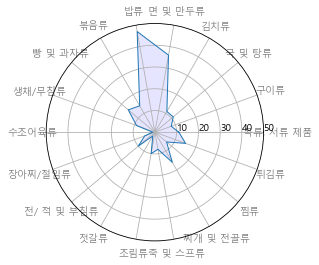

In [374]:
categories=list(gyeong_gi_count.index)[0:]
categories
 
N = len(categories)

values = gyeong_gi_count['count'].values.flatten().tolist()
values += values[:1]
values

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
#lt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,50)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

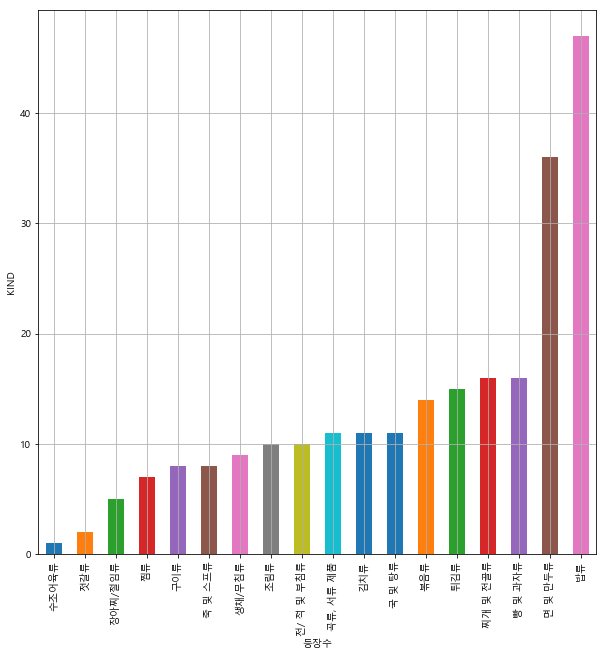

In [384]:
gyeong_gi_count['count'].sort_values().plot(kind='bar', grid= True, figsize = (10,10))
plt.xlabel('등장수')
plt.ylabel('KIND')
# for i, v in enumerate(gyeong_gi_count['count'].sort_values()):
#     plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold') 
plt.show()

In [392]:
seoul_food = food02[food02['식품이름'].str.contains('(\w|\w \w).+\(서울\)|(\w|\w \w).+\(\w\)\(서울\)')]
gyeong_gi_food = food02[food02['식품이름'].str.contains('(\w|\w \w).+\(경기도\)|(\w|\w \w).+\(\w\)\(경기도\)')]
kangwon_food = food02[food02['식품이름'].str.contains('(\w|\w \w).+\(강원도\)|(\w|\w \w).+\(\w\)\(강원도\)')]
gyeongsang_food = food02[food02['식품이름'].str.contains('(\w|\w \w).+\(경상도\)|(\w|\w \w).+\(\w\)\(경상도\)')]
jeolla_food = food02[food02['식품이름'].str.contains('(\w|\w \w).+\(전라도\)|(\w|\w \w).+\(\w\)\(전라도\)')]
chungcheong_food = food02[food02['식품이름'].str.contains('(\w|\w \w).+\(충청도\)|(\w|\w \w).+\(\w\)\(충청도\)')]

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-pac

In [393]:
print(len(seoul_food))
print(len(gyeong_gi_food))
print(len(kangwon_food))
print(len(gyeongsang_food))
print(len(jeolla_food))
print(len(chungcheong_food))

237
237
237
237
237
237


In [408]:
chungcheong_food

,번호,식품군,식품이미지,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
6,7,밥류,NaN,콩나물해장국(충청도),700,147.0,9.12,26.52,0.62,0.00,1972.24,105.40,1.53,0.02
13,14,밥류,NaN,소머리국밥(충청도),800,448.0,14.87,55.81,18.42,0.00,729.71,165.43,6.11,0.27
21,22,밥류,NaN,김밥(충청도),200,302.0,56.83,7.39,5.08,0.08,842.58,54.64,2.64,0.10
28,29,밥류,NaN,김치김밥(충청도),250,345.0,59.22,11.41,7.02,0.53,1253.24,86.78,1.49,0.05
35,36,밥류,NaN,샐러드김밥(충청도),250,425.0,60.37,9.26,16.33,2.47,864.90,87.78,2.70,0.06
42,43,밥류,NaN,소고기김밥(충청도),250,410.0,59.63,17.39,11.44,0.92,1069.80,105.24,2.55,0.04
49,50,밥류,NaN,참치김밥(충청도),250,407.5,53.99,17.59,13.48,0.00,908.22,43.99,2.92,0.07
57,58,밥류,NaN,치즈김밥(충청도),250,435.0,63.07,11.72,15.06,0.39,1093.36,99.69,3.66,0.17
64,65,밥류,NaN,충무김밥(충청도),400,564.0,113.54,14.77,5.72,9.32,1340.70,40.60,1.18,0.03
71,72,밥류,NaN,고추장불고기 삼각김밥(충청도),100,160.0,33.03,3.89,1.32,0.28,353.25,4.09,0.47,0.02


In [412]:
del seoul_food['식품이미지']

In [415]:
food04 = pd.read_excel('../data/OPENDATA_FOOD_2.xls')

In [416]:
del food04['식품이미지']

In [420]:
food04 = food04.drop(seoul_food.index)
food04 = food04.drop(gyeong_gi_food.index)
food04 = food04.drop(kangwon_food.index)
food04 = food04.drop(gyeongsang_food.index)
food04 = food04.drop(jeolla_food.index)
food04 = food04.drop(chungcheong_food.index)

In [426]:
food04.loc[food04['식품이름'] == '콩나물해장국']

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
342,343,밥류,콩나물해장국,700,223.26,12.05,24.0,8.78,0.06,1950.91,125.03,1.48,0.03


In [427]:
food04

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g)
7,8,밥류,소머리국밥,800,631.99,17.53,75.98,28.66,0.00,823.26,241.92,9.67,0.60
14,15,밥류,"국밥, 굴",100,105.13,13.60,6.53,2.73,0.05,251.60,79.75,0.61,0.02
15,16,밥류,김밥,200,317.68,57.57,7.26,6.48,0.50,833.29,40.49,2.75,0.06
22,23,밥류,김치김밥,250,344.97,60.67,10.93,6.51,1.86,1145.54,74.18,1.58,0.05
29,30,밥류,샐러드김밥,250,405.95,61.45,9.61,13.52,3.42,911.18,84.58,2.79,0.06
36,37,밥류,소고기김밥,250,400.61,62.52,15.98,9.62,0.84,1061.19,93.08,2.53,0.11
43,44,밥류,참치김밥,250,424.07,64.76,12.73,12.68,0.60,1108.41,97.82,3.91,0.19
50,51,밥류,치즈김밥,300,510.00,77.70,15.30,15.30,0.60,1330.08,117.39,4.80,0.30
51,52,밥류,치즈김밥,300,1395.00,234.90,52.20,27.00,0.00,2649.00,151.20,12.60,0.00
58,59,밥류,충무김밥,400,583.93,109.16,23.42,5.96,17.19,1294.27,156.85,1.10,0.02


In [428]:
food04.to_excel('edited_food_data_02.xlsx')

In [448]:
food04 = food04.reset_index(drop=True)

In [434]:
food04_drops = food04.duplicated(['식품이름'])

In [444]:
food04_drops = food04_drops.reset_index(drop=True)

In [449]:

list_food = []
lgth = len(food04_drops)
j = 0
for j in range(lgth):
    if food04_drops[j]:
        j = j + 1
        print(j, food04['식품이름'][j], food04['1회제공량 (g)'][j], food04['열량 (kcal)'][j])
print(j)

#food04.duplicated(['식품이름'])

9 충무김밥 400 583.93
80 모닝빵 70 231.86
82 채소고로케 100 300.65
85 페이스트리빵 70 319.59
88 햄치즈샌드위치 200 436.52
122 야채칩 100 72.2
183 구슬 파스타 120 299.86
315 부대찌개(의정부) 600 399.5
450 돼지고기볶음 200 350.67
654 증편 100 192.73
698 辛리브샌드 188 903.06
728 빅맥 213 1086.3
731 쿼터파운더치즈 100 266.48
739 불고기와퍼쥬니어 158 601.13
748 햄버거 121 370.26
749 빵,크로아쌍, 소시지크라상(버거킹) 100 349.0
778 스위피버거 159 674.16
1176 크라운포켓 직화불고기M 166 687.24
1343 포테이토 스위트 히든엣지(L) 166 709.37
1371 뉴욕스페셜 오리진 L 106 288.12
1445 로맨틱콤보(L, 크림치즈엣지) 152 601.92
1453 로맨틱콤보(R, 오리진엣지) 160 659.2
1585 포테이토피자 치즈캡 R 108 295.7
1595 프리미엄 시크릿가든 R 100 261.27
1801 명품쌀피자 불고기 피자 L 100 244.07
1977 바바리안필드 60 129.0
2022 초코칩스콘 75 202.5
2132 마늘토스트 100 375.24
2201 블루베리요거트듬뿍 70 230.0
2318 쫄깃한 곡물식빵 110 225.0
2330 찹쌀앙금빵 80 172.0
2362 치즈호두빵 75 183.75
2376 케익꽤배기도넛 85 246.5
2391 크림패스츄리 78 183.3
2413 포켓샌드 블루베리 84 172.2
2429 행복을 나누고 싶은 블루베리롤 55 90.75
2771 메이플쉬폰 70 142.1
2812 샤르르르 녹는 치즈케익 82 226.32
2816 소세지빵 68 130.56
2830 엔젤케익 70 161.7
3053 떡볶이 100 119.4
3054 어묵 100 112.1
3055 고기만두 100 169.91
305